In [26]:
import pandas as pd
import os
from os import listdir
import numpy as np
import matplotlib.pyplot as plt

In [27]:
listdir("./")

['.ipynb',
 '.ipynb_checkpoints',
 'code',
 'codeplotten.py',
 'codetest.py',
 'CPC.csv',
 'CPC.ipynb',
 'Das',
 'DOS _0.5_and_1_on_PMDS.csv',
 'Dos.csv',
 'DOS.ipynb',
 'Dos_0.5and_1_on_Steel.csv',
 'Dos_0.5_and_1_on_PDMS.ipynb',
 'Dos_0.5_and_1_on_Steel_no_comments.csv',
 'DOS_staal_0.5_and_1-Copy1.ipynb',
 'naDOS_staal_0.5_and_1.ipynb',
 'SDS.csv',
 'SDS.ipynb',
 'test.py',
 'triton.csv',
 'Triton.ipynb',
 'triton2.csv',
 'triton3.csv',
 'water_glas.csv',
 'water_glas.ipynb',
 'water_PDMS.csv',
 'water_staal.csv',
 'water_staal.ipynb']

In [28]:
df = pd.read_csv("./water_staal.csv", sep = ";")
df["water_metaal"].unique()

array([0], dtype=int64)

In [29]:
df

,water_metaal,time,hoek,error
0,0,1,55.4,0.58
1,0,2,74.8,0.11
2,0,3,83.2,0.68
3,0,5,84.1,0.12
4,0,8,74.4,0.42
5,0,15,73.9,0.47
6,0,25,73.3,1.35


In [30]:
df_list = list()
for conc in df["water_metaal"].unique():
    df_list.append(df[df["water_metaal"] == conc])

In [31]:
data_dict = dict()
for frame in df_list:
    time = frame["time"]
    angle = frame["hoek"]
    error = frame["error"]
    data_dict[frame["water_metaal"].unique()[0]] = (time,angle,error)

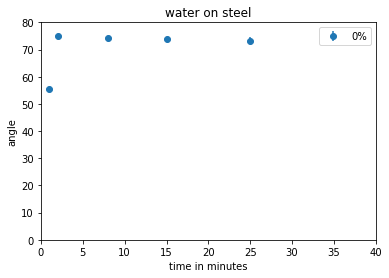

In [37]:
for name, values in data_dict.items():
    plt.errorbar(values[0],values[1],values[2], linestyle = "None", label = f"{name}%", marker = "o")
    
plt.legend()
plt.xlim(0,40)
plt.ylim(0,80)

plt.xlabel('time in minutes')
plt.ylabel('angle')

plt.title('water on steel')
plt.savefig('water on steel')

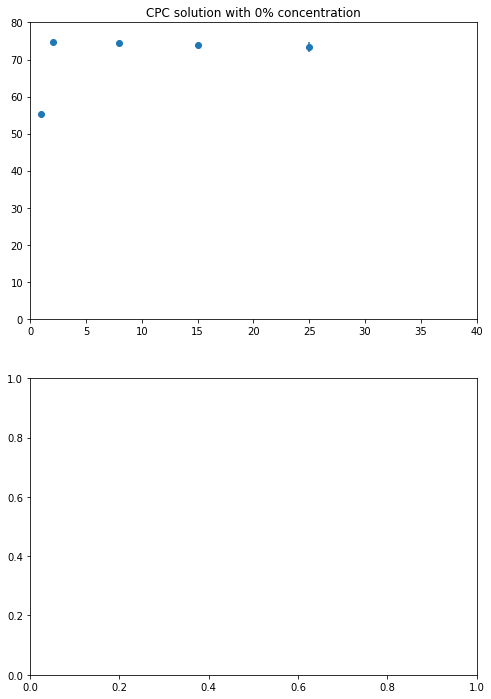

In [33]:

n_sets = 2

fig,ax = plt.subplots(n_sets,1, figsize = (8,12))
ax_idx = 0

for name, values in data_dict.items():
    ax[ax_idx].errorbar(values[0],values[1],values[2], linestyle = "None", label = f"{name}%", marker = "o")
    ax[ax_idx].set_xlim(0,40)
    ax[ax_idx].set_ylim(0,80)
    ax[ax_idx].set_title(f"CPC solution with {name}% concentration")
    ax_idx += 1

